In [1]:
import numpy as np
from scipy import stats

In [2]:
data = np.array([4,5,1,2,7,2,6,9,3])

# 평균
a = np.mean(data)
print("평균: ",a)

# 중위수
b = np.median(data)
print("중위수: ",b)

# 최빈값
c = stats.mode(data)
print("최빈값: ",c[0][0])

평균:  4.333333333333333
중위수:  4.0
최빈값:  2


In [3]:
from statistics import variance, stdev

points = np.array([20,80,90,95,87,89,95,99,97,100,60,70,77,88,89,89,90])

# 분산
a = variance(points)
print("분산: ",a)

# 표준편차
b = stdev(points)
print("표준편차: ",b)

# 범위
c = np.max(points) - np.min(points)
print("범위: ",c)

분산:  374
표준편차:  19.339079605813716
범위:  80


In [4]:
# 최대, 최소값
a = np.max(points)
b = np.min(points)
c = a - b

print("최대값: ", a)
print("최소값: ", b)
print("최대값 - 최소값(범위): ", c)

최대값:  100
최소값:  20
최대값 - 최소값:  80


In [5]:
# 백분위(자료(여기선 points)를 100등분해서 전체의 20% 지점, 80%지점, 100%지점을 구해보는 것)
for val in [20,80,100]:
    d = np.percentile(points,val)
    print(str(val)+"%",d)

20% 77.6
80% 95.0
100% 100.0


In [6]:
# 사분위수
a, b, c = np.percentile(points, [25,50,75])
print("1사분위수: ",a)
print("2사분위수(중위수): ",b)
print("3사분위수: ",c)
print("IQR: ", c-a)

1사분위수:  80.0
2사분위수(중위수):  89.0
3사분위수:  95.0
IQR:  15.0


In [7]:
import matplotlib.pyplot as plt

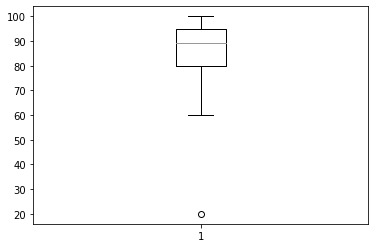

In [8]:
plt.boxplot(points) # 상자수염그림
plt.show()

In [9]:
import pandas as pd
from scipy import stats

# 귀무가설 : 두 데이터는 차이가 없다.
# 대립가설(내가 주장하고 싶은 것) : 두 데이터는 차이가 있다.

data1 = [4,6,17,16,8,9]
data2 = [10,10,10,10,10,10]

# pvalue 구하기
chis = stats.chisquare(data1, data2)

# pvalue가 0.05보다 작으므로 대립가설 채택 -> 유의미한 자료
chis

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [10]:
import pandas as pd
from scipy import stats

survey = pd.read_csv("c:/data/smoke/survey.csv")

# 흡연 빈도와 운동 빈도 필드를 기준으로 집계
data = pd.crosstab(survey.Smoke, survey.Exer)
print(data)

result = stats.chi2_contingency(observed=data)
print(result[0]) # 검정 통계량
print(result[1]) # pvalue (0.05보다 한참 크게 나왔으니 귀무가설 채택)

Exer   Freq  None  Some
Smoke                  
Heavy     7     1     3
Never    87    18    84
Occas    12     3     4
Regul     9     1     7
5.488545890584232
0.48284216946545633


In [15]:
# 귀무가설 : 학생들의 평균키는 175cm이다.
# 대립가설 : 학생들의 평균키는 175cm가 아니다.

# 랜덤시드 고정
np.random.seed(1)

# np.random.normal(평균, 표준편차)
heights = [180 + np.random.normal(0,5) for a in range(20)]
result = stats.ttest_1samp(heights, 175)
print("검정통계량: %.3f, p-value : %.3f" % result)

검정통계량: 3.435, p-value : 0.003


In [40]:
# 귀무가설 : 두 그룹의 평균키는 같다
# 대립가설 : 두 그룹의 평균키는 같지 않다.

np.random.seed(1)

# 독립표본 t 검정 : 두 개의 그룹이 같은지 다른지 알아보기
group1 = [170 + np.random.normal(0,5) for a in range(20)]
group2 = [175 + np.random.normal(0,10) for a in range(20)]
print("group1 평균 : ",np.mean(group1))
print("group2 평균 : ",np.mean(group2))

result1 = stats.ttest_ind(group1, group2)
print("검정통계량 : %.3f, p-value : %.3f." % result1)

group1 평균 :  169.33317681769637
group2 평균 :  174.54168687322976
검정통계량 : -2.329, p-value : 0.025.


In [50]:
# 등분산 가정을 하지 않을 때
result2 = stats.ttest_ind(group1, group2, equal_var=False)
print("검정통계량 : %.3f, p-value : %.3f." % result2)

검정통계량 : -2.329, p-value : 0.026.


In [53]:
# 귀무 가설 : 다이어트 약 복용 전후의 체중 차이가 없다.
# 대립 가설 : 다이어트 약 복용 전후의 체중 차이가 있다.

np.random.seed(1)
before = [60 + np.random.normal(0,5) for _ in range(20)] # 개별변수 : _ 인데 크게 중요하지 않기 때문에 _로 두어도 괜찮음
after = [w * np.random.normal(0.99, 0.02) for w in before] # before 리스트의 값 * 0.99, 표준편차 0.02
print(before)
print(after)

result = stats.ttest_rel(before, after)
print("검정통계량: %.3f, p-value: %.3f" % result)

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
[65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]
검정통계량: 2.915, p-value: 0.009


a 평균 :  79.0
b 평균 :  63.25
c 평균 :  63.125
d 평균 :  90.0


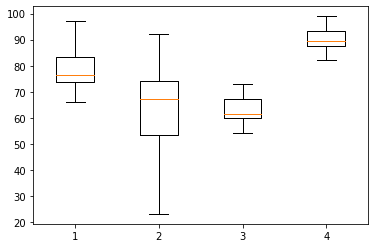

9.176162194964236 0.00021655560626506002


In [55]:
# 3개 이상의 데이터 그룹을 분석할 때, 일원배치 분산분석 기법(아노바 분석)을 쓴다
# 귀무 가설 : 4개의 교육훈련 기법 간의 차이가 없다.
# 대립 가설 : 차이가 있다.

a = [66,74,82,75,73,97,87,78]
b = [72,51,80,92,54,67,23,67]
c = [61,60,54,70,73,66,59,62]
d = [99,84,82,89,89,94,93,90]

print("a 평균 : ",np.mean(a))
print("b 평균 : ",np.mean(b))
print("c 평균 : ",np.mean(c))
print("d 평균 : ",np.mean(d))

plot_data = [a,b,c,d]

# boxplot 그래프로 그려보기
ax = plt.boxplot(plot_data)
plt.show()

# 아노바 분석
f, p = stats.f_oneway(a,b,c,d)
print(f, p)

In [56]:
# 귀무 가설 : 세 가지 비료의 수확량은 차이가 없다.
# 대립 가설 : 차이가 있다.

data = pd.read_csv("c:/data/anova/fertilizers.csv")
print(data)

result = stats.f_oneway(data["fertilizer1"], data["fertilizer2"], data["fertilizer3"])
print(result)
print(result[0]) # 통계량
print(result[1]) # pvalue

   fertilizer1  fertilizer2  fertilizer3
0           72           54           48
1           62           56           62
2           90           58           92
3           42           36           96
4           84           72           92
5           64           34           80
F_onewayResult(statistic=3.7551268418654105, pvalue=0.04762461989261837)
3.7551268418654105
0.04762461989261837


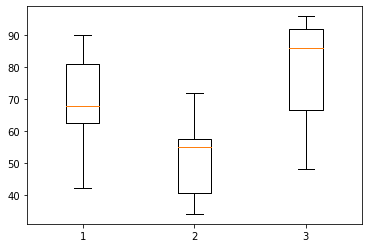

In [57]:
bx = plt.boxplot(data)
plt.show()

In [ ]:
# 검정통계량은 표본수, 표본평균/표준편차를 이용하여 계산된 값
# pvalue는 검정통계량을 통해 계산된 확률값

# boxplot 그래프(상자수염그림ㅋㅋ)는 데이터가 한쪽으로 쏠려있는지, 이상치가 있는지 쉽게 파악할 수 있게 시각화함
# boxplot의 박스에 있는 빨간 선이 중위값, 박스의 아래쪽 선이 25%(1사분위), 위쪽 선이 75%(3사분위)